In [106]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pylab as rcParams
plt.rcParams['figure.figsize']=(10,6)
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [107]:
train=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/New Folder/acea-water-prediction/LUPA.csv')
train2=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/New Folder/acea-water-prediction/LUPA.csv')

In [108]:
train

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,1/1/2009,2.797,NaN
1,2/1/2009,2.797,NaN
2,3/1/2009,2.797,NaN
3,4/1/2009,2.797,NaN
4,5/1/2009,2.797,NaN
...,...,...,...
4194,26/06/2020,0.000,-73.93
4195,27/06/2020,0.000,-73.60
4196,28/06/2020,0.000,-73.14
4197,29/06/2020,0.000,-72.88


In [109]:
train.isnull().sum()

Date                0
Rainfall_Terni      0
Flow_Rate_Lupa    382
dtype: int64

In [110]:
train = train[train.Flow_Rate_Lupa.notna()].reset_index(drop=True)

In [111]:
train.isnull().sum()

Date              0
Rainfall_Terni    0
Flow_Rate_Lupa    0
dtype: int64

In [112]:
train.columns = ['Date', 'Rainfall_Terni', 'Flow_Rate_Lupa']

targets = ['Flow_Rate_Lupa']
features = [feature for feature in train.columns if feature not in targets]
train.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,19/02/2009,2.763,-166.02
1,20/02/2009,2.763,-166.97
2,21/02/2009,2.763,-167.72
3,22/02/2009,2.763,-168.65
4,23/02/2009,2.763,-169.42


In [113]:
from datetime import datetime, date,timedelta

train['Date'] = pd.to_datetime(train['Date'])
#train.head().style.set_properties(subset=['Date'])
train.set_index(['Date'],inplace=True)
train.index                 
#indexedDataset=train.set_index(['Date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19984\3525749145.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train['Date'] = pd.to_datetime(train['Date'])


DatetimeIndex(['2009-02-19', '2009-02-20', '2009-02-21', '2009-02-22',
               '2009-02-23', '2009-02-24', '2009-02-25', '2009-02-26',
               '2009-02-27', '2009-02-28',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='Date', length=3817, freq=None)

In [102]:
train.describe()         

,Rainfall_Terni,Flow_Rate_Lupa
count,3817.000000,3817.000000
mean,2.470262,-97.712916
std,2.099983,15.026314
min,0.000000,-182.310000
25%,1.402000,-105.760000
50%,2.131000,-96.590000
75%,3.165000,-87.220000
max,76.000000,0.000000


In [114]:
#plt.xlabel('Date')
#plt.ylabel('Number of passengers:')
#plt.plot(indexedDataset)

train['Date']=train.index.date
train['Month_Year'] = train['Date'].apply(lambda x: x.strftime('%B-%Y')) 
indexedDataset=train.set_index(["Month_Year"])
train.head()

,Rainfall_Terni,Flow_Rate_Lupa,Date,Month_Year
Date,,,,
2009-02-19,2.763,-166.02,2009-02-19,February-2009
2009-02-20,2.763,-166.97,2009-02-20,February-2009
2009-02-21,2.763,-167.72,2009-02-21,February-2009
2009-02-22,2.763,-168.65,2009-02-22,February-2009
2009-02-23,2.763,-169.42,2009-02-23,February-2009


In [115]:
train.dtypes

Rainfall_Terni    float64
Flow_Rate_Lupa    float64
Date               object
Month_Year         object
dtype: object

In [116]:
train.describe()         

,Rainfall_Terni,Flow_Rate_Lupa
count,3817.000000,3817.000000
mean,2.470262,-97.712916
std,2.099983,15.026314
min,0.000000,-182.310000
25%,1.402000,-105.760000
50%,2.131000,-96.590000
75%,3.165000,-87.220000
max,76.000000,0.000000


In [41]:
latest=train.loc['2015':'2020']
latest.head()
latest.shape

(1939, 3)

In [122]:
latest[['Rainfall_Terni','Flow_Rate_Lupa']].groupby(['Rainfall_Terni']).mean().sort_values('Flow_Rate_Lupa')

,Flow_Rate_Lupa
Rainfall_Terni,
4.6,-114.26
8.2,-114.21
16.4,-114.06
4.2,-113.99
7.8,-113.94
...,...
4.4,-81.83
20.0,-81.51
8.0,-81.23


<Axes: xlabel='Month_Year', ylabel='Flow_Rate_Lupa'>

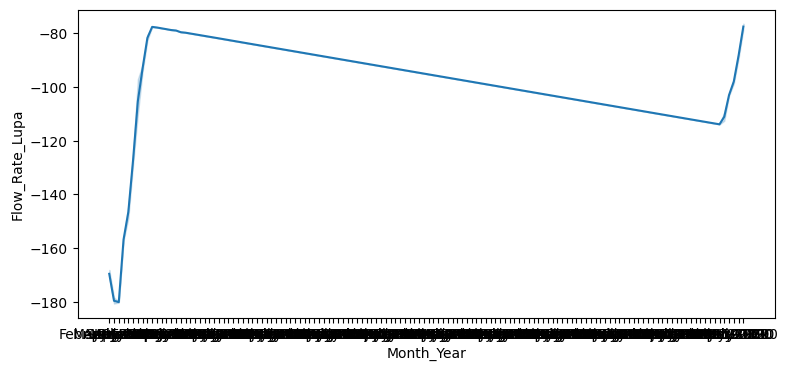

In [117]:
plt.figure(figsize=(9,4))
sns.lineplot(x="Month_Year",y='Flow_Rate_Lupa',data=train)

In [118]:
resample=train[['Flow_Rate_Lupa']].resample('A').mean()

In [120]:
resample.shape

(12, 1)

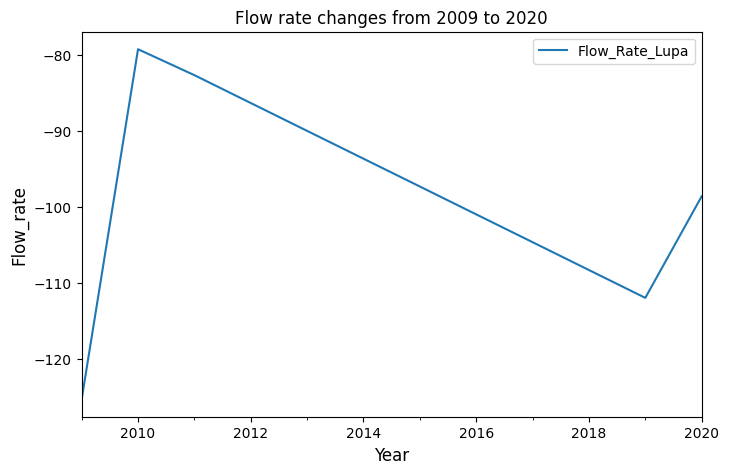

In [52]:
resample.plot(title='Flow rate changes from 2009 to 2020',figsize=(8,5))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Flow_rate',fontsize=12)
plt.legend()

In [60]:

from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results:')
test=adfuller(resample.iloc[:0].values,autolag='AIC')
output=pd.Series(test[0:4],index=['Test Stat','p-value','Lags used','Number of observe'])

for key,value in test[4].items():
    output['Critical value (%s)' %key] = value
print(output)    
    

Dickey Fuller Test Results:


ValueError: sample size is too short to use selected regression component